# Assignment 7
### Submitted by Sejal Ghate


Data Cleaning:


In [1]:
from google.colab import files
uploaded = files.upload()

Saving shhs.txt to shhs.txt


In [29]:
#from google.colab import drive
#drive.mount('/content/MyDrive/DS4PH-BME/shhs.txt/')

ValueError: ignored

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


# Load the file and select only required columns
dat = pd.read_csv("shhs.txt")
dat['log_r'] = np.log(dat['rdi4p'])+1   #add a column
dat = dat[['rdi4p','log_r','bmi']]
print(dat.shape[0])
dat.head()



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


6441


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,rdi4p,log_r,bmi
0,1.438083,1.363311,21.78
1,17.802198,3.879322,32.95
2,4.853556,2.579712,24.11
3,0.797342,0.773529,20.19
4,2.756757,2.014055,23.31


In [25]:
# Remove any unwanted Na rows or rows filled with missing data indicated with '.'

dat = dat[dat != '.']
dat = dat.dropna()
dat = dat.apply(pd.to_numeric)

print(dat.shape[0])
print(dat.head())
print(dat.dtypes)
dat = pd.DataFrame(dat)
dat.head()
dat['int'] = 1
dat.head()
dat = dat.replace([-np.inf, np.inf], 0)

6333
       rdi4p     log_r    bmi  int
0   1.438083  1.363311  21.78    1
1  17.802198  3.879322  32.95    1
2   4.853556  2.579712  24.11    1
3   0.797342  0.773529  20.19    1
4   2.756757  2.014055  23.31    1
rdi4p    float64
log_r    float64
bmi      float64
int        int64
dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


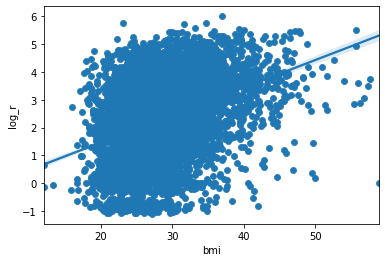

In [38]:

sns.scatterplot(dat['bmi'], dat['log_r'])

sns.regplot(dat['bmi'], dat['log_r'])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [42]:
dat.isnull().values.any()

False

In [36]:
fitted = smf.ols('log_r ~ bmi', data = dat).fit()
fitted.summary()

dat['pred'] = fitted.predict()
dat.head(10)
fitted.predict(pd.DataFrame({'bmi' : [30]}))

0    2.451672
dtype: float64